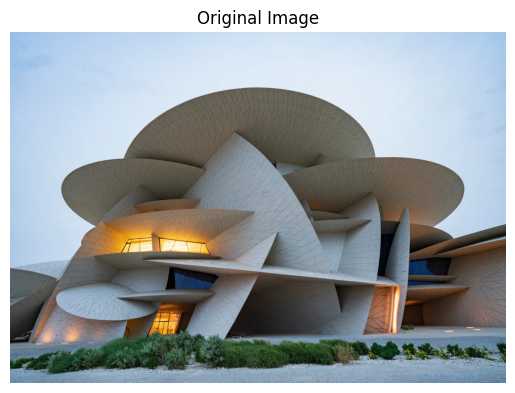

In [10]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Pic1.webp') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for proper display

# Display the image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

## Steps of Harris Corner Detection

1. **Convert to Grayscale**
2. **Compute Gradients**: Calculate the image gradients (`Ix` and `Iy`) in the x and y directions using filters like Sobel or Prewitt.
3. **Compute Structure Tensor**: For each pixel, compute the structure tensor matrix
4. **Corner Response Function**: Compute the corner response \(R\) using the formula:
   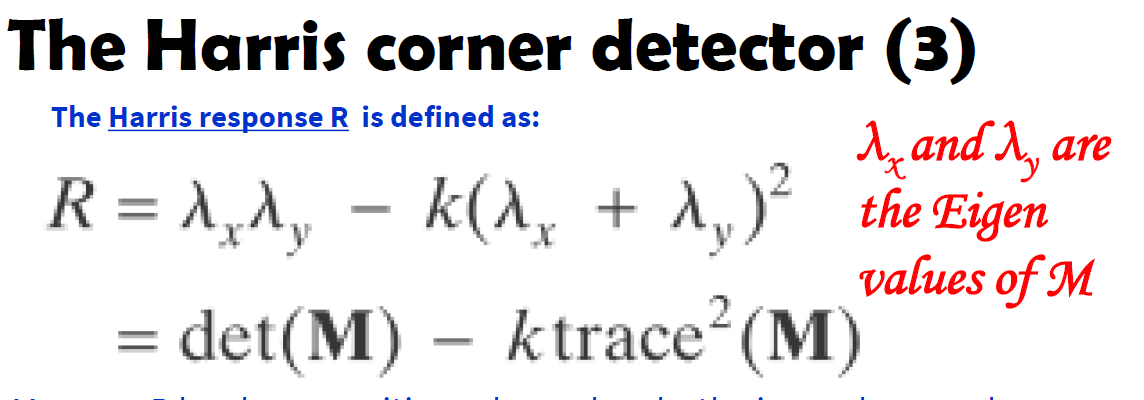
5. **Thresholding**: Apply a threshold to \(R\) to identify strong corners.
6. **Non-Maximum Suppression**: Perform non-maximum suppression to retain only the most prominent corners and eliminate weaker

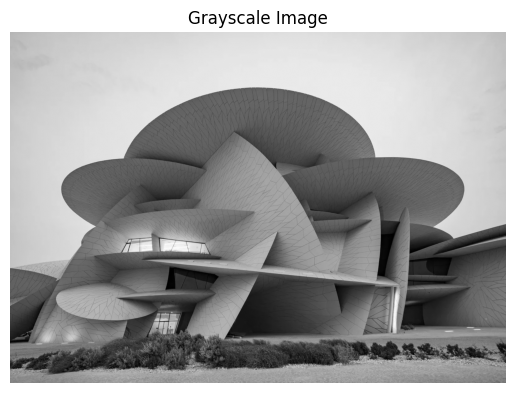

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

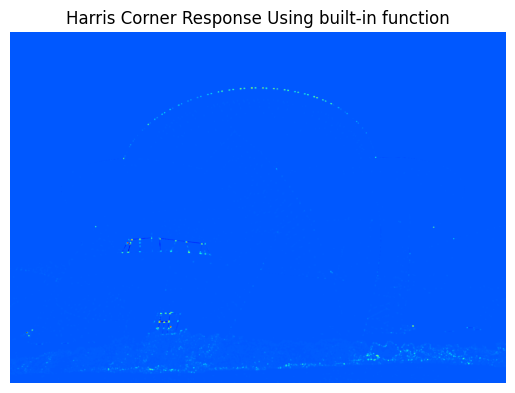

In [22]:
# Apply Harris Corner Detection
gray_image = np.float32(gray_image)  # Convert to float32 for Harris function
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# Dilate the corner points for better visibility
dst = cv2.dilate(dst, None)

# Display the Harris response
plt.imshow(dst, cmap='jet')
plt.title("Harris Corner Response Using built-in function") 
plt.axis('off')
plt.show()

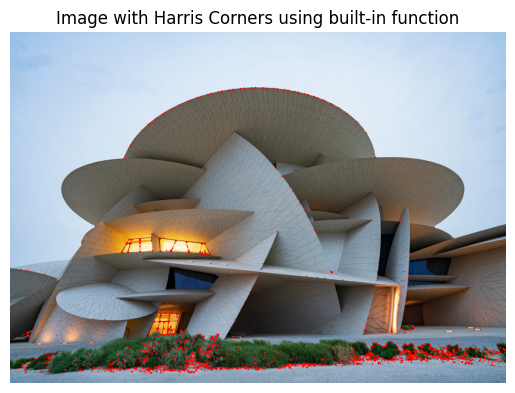

In [23]:
# Threshold for an optimal value, marking the corners in red
image_with_corners = image.copy()
image_with_corners[dst > 0.01 * dst.max()] = [255, 0, 0]  # Mark corners in red

# Display the image with corners
plt.imshow(image_with_corners)
plt.title("Image with Harris Corners using built-in function")
plt.axis('off')
plt.show()

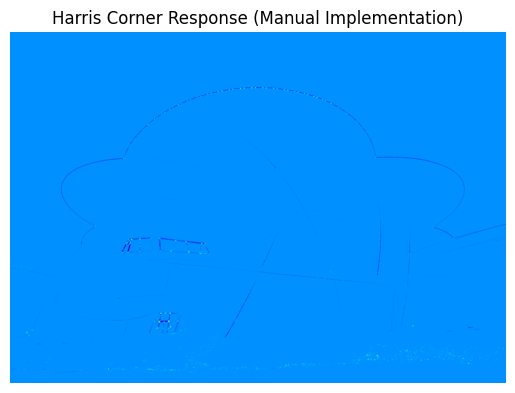

In [26]:
# Step 1: Compute image gradients using Sobel filters
Ix = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
Iy = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction

# Step 2: Compute products of gradients
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

# Step 3: Apply Gaussian filter to the gradient products
Ixx = cv2.GaussianBlur(Ixx, (3, 3), sigmaX=1)
Iyy = cv2.GaussianBlur(Iyy, (3, 3), sigmaX=1)
Ixy = cv2.GaussianBlur(Ixy, (3, 3), sigmaX=1)

# Step 4: Compute the Harris response matrix
k = 0.04  # Harris detector free parameter
det_M = (Ixx * Iyy) - (Ixy * Ixy)  # Determinant of M (2x2 matrix)
trace_M = Ixx + Iyy  # Trace of M
R = det_M - k * (trace_M ** 2)  # Harris response

# Step 5: Normalize the response for better visualization
R_normalized = cv2.normalize(R, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Step 6: Display the Harris response
plt.imshow(R_normalized, cmap='jet')
plt.title("Harris Corner Response (Manual Implementation)")
plt.axis('off')
plt.show()

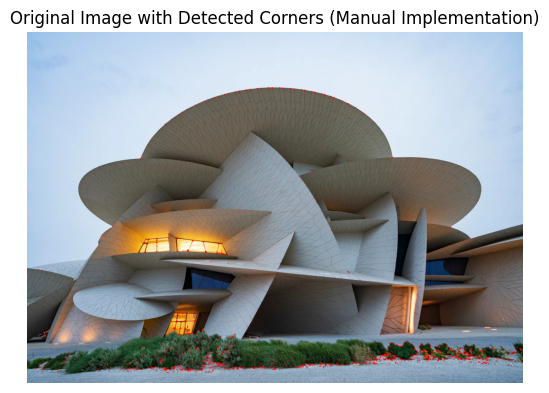

In [24]:
# Overlay the corners on the original image
result_image = image.copy()
result_image[R > 0.01 * R.max()] = [255, 0, 0]  # Mark corners in red

# Display the result
plt.imshow(result_image)
plt.title("Original Image with Detected Corners (Manual Implementation)")
plt.axis('off')
plt.show()